Data Exploration Reference: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python#COMPREHENSIVE-DATA-EXPLORATION-WITH-PYTHON

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("lianjia.csv", encoding='iso-8859-1', low_memory = False)
df['price'] /= 10000
df['communityAverage'] /= 10000
df.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/BJCP85023690....,BJCP85023690,116.439341,40.082372,1.110000e+12,2012-10-11,1.0,0,11.5,0.1001,114.95,2,1,1,1,4.0,2004,1,2,0.500,0.0,0.0,0.0,6,3.8281
1,https://bj.lianjia.com/chengjiao/BJCP85020224....,BJCP85020224,116.431552,40.082903,1.110000e+12,2012-10-23,1.0,0,12.0,0.1002,119.80,2,1,1,2,3.0,2004,1,6,0.333,1.0,0.0,0.0,6,3.6869
2,https://bj.lianjia.com/chengjiao/BJCP84942984....,BJCP84942984,116.431552,40.082903,1.110000e+12,2012-09-17,1.0,0,12.0,0.1003,119.71,2,2,1,2,4.0,2004,1,6,0.333,1.0,1.0,0.0,6,3.6869
3,https://bj.lianjia.com/chengjiao/BJCP85669367....,BJCP85669367,116.431552,40.082903,1.110000e+12,2013-03-27,NaN,0,11.6,0.1007,114.64,2,2,1,2,3.0,2004,1,6,0.333,1.0,0.0,0.0,6,3.6869
4,https://bj.lianjia.com/chengjiao/BJCP85607005....,BJCP85607005,116.431552,40.082903,1.110000e+12,2013-03-15,NaN,0,11.6,0.1008,114.52,2,2,1,2,4.0,2005,1,2,0.500,0.0,0.0,0.0,6,3.6869


In [146]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
DOM,157736,0.495335
buildingType,2020,0.006343
communityAverage,462,0.001451
subway,32,0.000100
fiveYearsProperty,32,0.000100
elevator,32,0.000100
price,0,0.000000
id,0,0.000000
Lng,0,0.000000
Lat,0,0.000000


In [147]:
df.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,318443.000000,318443.000000,3.184430e+05,160707.000000,318443.000000,318443.000000,318443.000000,318443.000000,318443.000000,316423.000000,318443.000000,318443.000000,3.184430e+05,318411.000000,318411.000000,318411.000000,318443.000000,317981.000000
mean,116.418452,39.949518,1.128090e+12,28.850934,16.752533,349.471887,4.358580,83.215780,0.994592,3.009496,2.608156,4.451695,6.324527e+01,0.577113,0.645929,0.601232,6.763502,6.369130
std,0.112082,0.091967,2.357925e+12,50.255563,34.225975,230.598157,2.166773,37.221696,0.109507,1.269899,1.311355,1.901596,2.508456e+04,0.494019,0.478231,0.489646,2.813045,2.232519
min,116.072514,39.627030,1.110000e+12,1.000000,0.000000,4.000000,0.100100,6.900000,0.000000,0.048000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,1.084700
25%,116.344985,39.893200,1.110000e+12,1.000000,0.000000,205.000000,2.808900,57.900000,1.000000,1.000000,1.000000,2.000000,2.500000e-01,0.000000,0.000000,0.000000,6.000000,4.633900
50%,116.416780,39.934527,1.110000e+12,7.000000,5.000000,294.500000,3.876300,74.230000,1.000000,4.000000,3.000000,6.000000,3.330000e-01,1.000000,1.000000,1.000000,7.000000,5.901500
75%,116.477581,40.002876,1.110000e+12,37.000000,18.000000,426.000000,5.384400,98.680000,1.000000,4.000000,4.000000,6.000000,5.000000e-01,1.000000,1.000000,1.000000,8.000000,7.599100
max,116.732378,40.252758,1.110000e+15,1677.000000,1143.000000,18130.000000,15.625000,1745.500000,4.000000,4.000000,4.000000,6.000000,1.000940e+07,1.000000,1.000000,1.000000,13.000000,18.310900


In [148]:
df.corr()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
Lng,1.000000,0.040588,-0.007314,-0.014243,-0.012822,-0.069861,-0.153532,0.064421,0.059251,0.008629,-0.005760,0.041911,0.002028,0.044366,0.009743,-0.015849,0.223171,-0.174967
Lat,0.040588,1.000000,-0.000264,0.022916,-0.005308,0.021171,-0.050626,0.118965,-0.000904,0.099469,0.012751,-0.157732,-0.000195,-0.102627,0.010474,-0.076940,0.308744,-0.067231
Cid,-0.007314,-0.000264,1.000000,0.000950,0.001265,0.000058,-0.000408,-0.000407,-0.002440,0.006181,-0.001020,0.001105,-0.000019,-0.000505,-0.008743,0.001009,-0.004442,-0.005506
DOM,-0.014243,0.022916,0.000950,1.000000,0.465309,0.224843,0.214803,0.081536,0.010828,-0.010688,0.151669,0.025173,-0.001085,0.023419,-0.044709,0.009848,-0.001308,0.026149
followers,-0.012822,-0.005308,0.001265,0.465309,1.000000,0.152003,0.256640,-0.050552,0.007667,0.010823,0.240684,-0.022775,-0.000202,-0.020834,0.049341,0.018146,-0.032458,-0.012487
totalPrice,-0.069861,0.021171,0.000058,0.224843,0.152003,1.000000,0.621314,0.578215,0.081729,-0.060125,0.249399,0.187997,-0.001070,0.192570,-0.004249,0.113066,0.010373,0.421802
price,-0.153532,-0.050626,-0.000408,0.214803,0.256640,0.621314,1.000000,-0.164001,0.013468,-0.048373,0.293106,0.042330,0.001104,0.050455,0.012838,0.232842,0.034338,0.685299
square,0.064421,0.118965,-0.000407,0.081536,-0.050552,0.578215,-0.164001,1.000000,0.087795,-0.013786,0.032224,0.156783,-0.002421,0.168230,-0.017390,-0.094628,-0.007156,-0.145358
kitchen,0.059251,-0.000904,-0.002440,0.010828,0.007667,0.081729,0.013468,0.087795,1.000000,0.012964,-0.009748,-0.010634,0.000124,-0.004993,0.045931,0.010777,-0.033755,0.024487
buildingType,0.008629,0.099469,0.006181,-0.010688,0.010823,-0.060125,-0.048373,-0.013786,0.012964,1.000000,-0.011067,-0.535638,-0.000016,-0.630108,-0.000346,-0.147446,0.043847,-0.089597


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


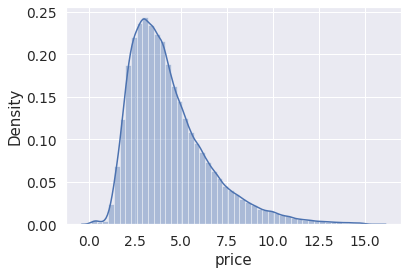

In [149]:
sns.distplot(df['price'])

In [150]:
df = df[['price','followers', 'kitchen', 'renovationCondition', 'elevator', 'subway', 'communityAverage', 'Lng', 'Lat',  'totalPrice', 'livingRoom', 'drawingRoom', 'bathRoom',  'constructionTime', 'renovationCondition','ladderRatio']]
df.head()

,price,followers,kitchen,renovationCondition,elevator,subway,communityAverage,Lng,Lat,totalPrice,livingRoom,drawingRoom,bathRoom,constructionTime,renovationCondition,ladderRatio
0,0.1001,0,1,1,0.0,0.0,3.8281,116.439341,40.082372,11.5,2,1,1,2004,1,0.500
1,0.1002,0,1,1,1.0,0.0,3.6869,116.431552,40.082903,12.0,2,1,2,2004,1,0.333
2,0.1003,0,1,1,1.0,0.0,3.6869,116.431552,40.082903,12.0,2,2,2,2004,1,0.333
3,0.1007,0,1,1,1.0,0.0,3.6869,116.431552,40.082903,11.6,2,2,2,2004,1,0.333
4,0.1008,0,1,1,0.0,0.0,3.6869,116.431552,40.082903,11.6,2,2,2,2005,1,0.500


In [151]:
df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318443 entries, 0 to 318442
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   price                318443 non-null  float64
 1   followers            318443 non-null  int64  
 2   kitchen              318443 non-null  int64  
 3   renovationCondition  318443 non-null  int64  
 4   elevator             318411 non-null  float64
 5   subway               318411 non-null  float64
 6   communityAverage     317981 non-null  float64
 7   Lng                  318443 non-null  float64
 8   Lat                  318443 non-null  float64
 9   totalPrice           318443 non-null  float64
 10  livingRoom           318443 non-null  object 
 11  drawingRoom          318443 non-null  object 
 12  bathRoom             318443 non-null  object 
 13  constructionTime     318443 non-null  object 
 14  renovationCondition  318443 non-null  int64  
 15  ladderRatio      

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [152]:
X = df.drop('price', axis = 1)
y = df['price']
y.describe()

count    318443.000000
mean          4.358580
std           2.166773
min           0.100100
25%           2.808900
50%           3.876300
75%           5.384400
max          15.625000
Name: price, dtype: float64

In [153]:
#skewness and kurtosis
print("Skewness: %f" % y.skew())
print("Kurtosis: %f" % y.kurt())

Skewness: 1.314505
Kurtosis: 2.186004


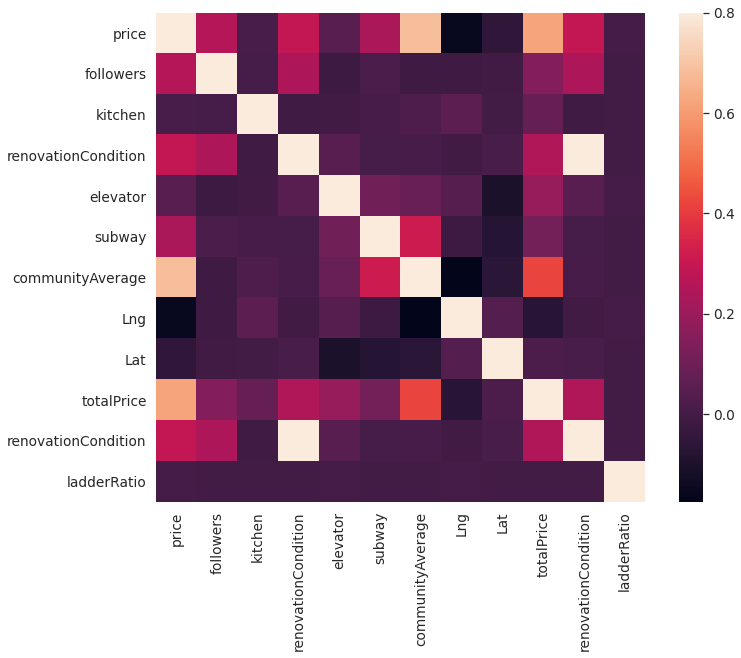

In [154]:
#correlation matrix
import matplotlib.pyplot as plt
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

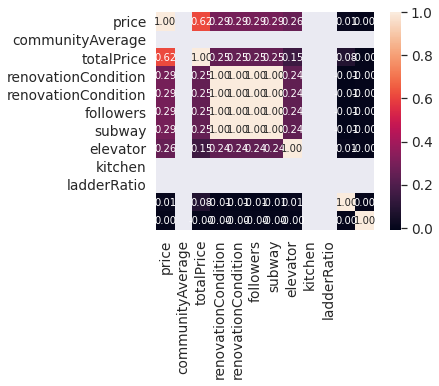

In [155]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [156]:
#scatterplot
# sns.set()
# cols = ['price','followers', 'kitchen', 'renovationCondition', 'elevator', 'subway', 'communityAverage']
# sns.pairplot(df[cols], size = 2.5)
# plt.show();

In [157]:
#outliar univariate analysis
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.9653592 ]
 [-1.96531305]
 [-1.9652669 ]
 [-1.96508229]
 [-1.96503614]
 [-1.96498999]
 [-1.96494384]
 [-1.96494384]
 [-1.96485154]
 [-1.96480538]]

outer range (high) of the distribution:
[[4.90823891]
 [4.90842352]
 [4.90851582]
 [4.90883889]
 [4.90943886]
 [4.90966962]
 [4.91119262]
 [4.91119262]
 [4.91119262]
 [5.19964052]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Evaluation Methods reference: https://www.kaggle.com/aadhavvignesh/regression-with-scikit-learn-practical-ml-1

In [158]:
df = pd.read_csv("lianjia.csv", encoding='iso-8859-1', low_memory = False)
df = df[['price', 'followers', 'kitchen', 'renovationCondition', 'elevator', 'subway', 'communityAverage']]
df['price'] = df['price'].div(10000)
df['communityAverage'] = df['communityAverage'].div(10000)
df = df.fillna(df.mean())
X = df.drop('price', axis = 1)
y = df['price']

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [160]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

results_df = pd.DataFrame()
columns = ["Model", "Cross Val Score", "MAE", "MSE", "RMSE", "R2"]

def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def append_results(model_name, model, results_df, y_test, pred):
    results_append_df = pd.DataFrame(data=[[model_name, *evaluate(y_test, pred) , cross_val_score(model, X, y, cv=10).mean()]], columns=columns)
    results_df = results_df.append(results_append_df, ignore_index = True)
    return results_df

## **Linear Regression**

In [161]:
from sklearn.linear_model import LinearRegression

LinearReg = LinearRegression(normalize=True)
LinearReg.fit(X_train,y_train)

pred = LinearReg.predict(X_test)

results_df = append_results("Linear Regression",  LinearRegression(), results_df, y_test, pred)

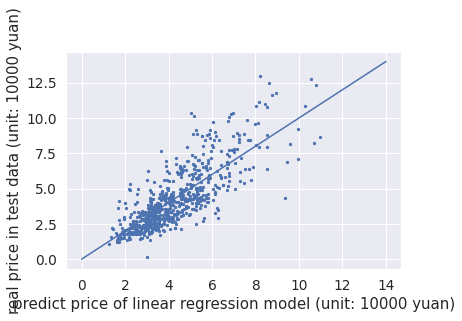

In [162]:
plt.scatter(pred[0::100], y_test[0::100], s=5)
b=a=np.linspace(0,14,100)
plt.plot(a,b)
plt.xlabel("predict price of linear regression model (unit: 10000 yuan)")
plt.ylabel("real price in test data (unit: 10000 yuan)")
plt.savefig('linear.png')
plt.show()

## **Robust Regression**

In [163]:
from sklearn.linear_model import RANSACRegressor

RobustReg = RANSACRegressor()
RobustReg.fit(X_train, y_train)

pred = RobustReg.predict(X_test)
results_df = append_results("Robust Regression",  RANSACRegressor(), results_df, y_test, pred)

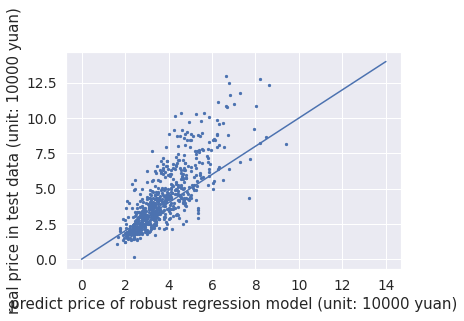

In [164]:
plt.scatter(pred[0::100], y_test[0::100],s=5)
plt.plot(a,b)
plt.xlabel("predict price of robust regression model (unit: 10000 yuan)")
plt.ylabel("real price in test data (unit: 10000 yuan)")
plt.savefig('robust.png')
plt.show()

## **Lasso Regression**

In [165]:
from sklearn.linear_model import Lasso

LassoReg = Lasso()
LassoReg.fit(X_train, y_train)
pred = LassoReg.predict(X_test)
results_df = append_results("Lasso Regression",  Lasso(), results_df, y_test, pred)

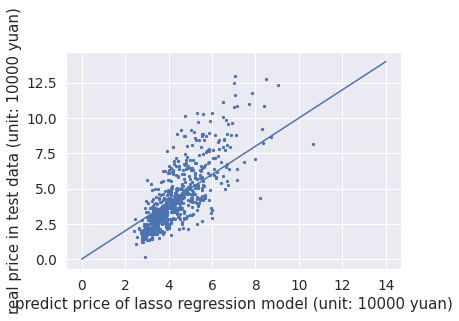

In [166]:
plt.scatter(pred[0::100], y_test[0::100],s=5)
plt.plot(a,b)
plt.xlabel("predict price of lasso regression model (unit: 10000 yuan)")
plt.ylabel("real price in test data (unit: 10000 yuan)")
plt.savefig('lasso.png')
plt.show()

In [167]:
print(results_df)

               Model  Cross Val Score       MAE       MSE      RMSE         R2
0  Linear Regression         1.020368  1.902634  1.379360  0.590770 -42.507869
1  Robust Regression         1.055942  2.503418  1.582219  0.461549 -56.517146
2   Lasso Regression         1.128007  2.351803  1.533559  0.494160 -44.375315
